# aperature photometry

In [16]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

hdu = fits.open('v_cluster_reduced.fits')
science_frame_V = hdu[0].data

In [1]:
ls

b_cluster_reduced.fits  hr_gen.py                 v_cluster_reduced.fits
b_science_reduced.fits  NGC6819_processing.ipynb  v_science_reduced.fits
good_HR.png             photometry_fun.ipynb
hr_diagram.png          phot.py


In [5]:
import photutils

## science frame V

find counts in each star for V filter

start with V filter because better for stars

use the same points in B filter to keep consistent

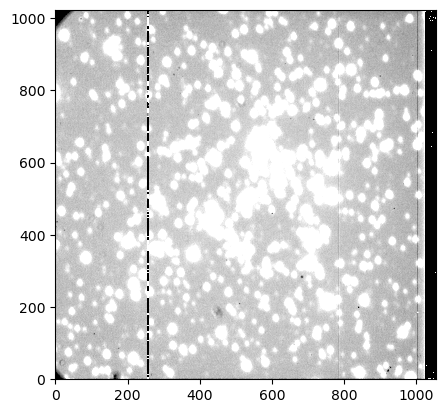

In [14]:
img = plt.imshow(science_frame_V, origin='lower', cmap='gray', vmin=1,vmax=4) # plot data
plt.show()

In [17]:
# try getting started with photutils
imageV = science_frame_V[10:1000, 50: 900]

imageV -= np.median(imageV)  

print(1000-10, 9000-50)
print(len(science_frame_V))

990 8950
1024


In [18]:
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std

bkg_sigma = mad_std(imageV)  
daofind = DAOStarFinder(fwhm=15.0, threshold=2.5 * bkg_sigma)  
sources = daofind(imageV)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid ycentroid sharpness   roundness1  ... npix sky     peak       flux       mag    
--- --------- --------- ---------- ------------ ... ---- --- ----------- --------- -----------
  1 369.29775 1.0301129 0.71276506  0.026685688 ...  361   0  0.15260661 1.2331119  -0.2275062
  2   747.711 3.3775319 0.92480023   0.13967507 ...  361   0  0.68515495 2.8003419  -1.1180276
  3 268.02756 7.1771415 0.45197298  -0.14577304 ...  361   0   6.5302172 30.524033  -3.7116048
  4 790.55845 8.6921986 0.49576222  -0.11417975 ...  361   0   41.796574  180.4649  -5.6409819
  5 61.222234 10.347585 0.48970623 -0.055377308 ...  361   0   4.8921855 21.511935  -3.3316987
  6 79.726307 14.367776 0.42524136  -0.21722895 ...  361   0    2.432093 10.582824   -2.561504
  7 155.67023 14.062032 0.57056367  -0.11441411 ...  361   0   1.8718774 8.1905162  -2.2832782
  8 94.736376 14.681971 0.56393407  -0.13985229 ...  361   0   4.9784994 19.627355  -3.2321545
  9 255.66794  17.53994 0.64350076   -0.1679191 ..

In [19]:
from photutils.aperture import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=15.0)  
phot_table = aperture_photometry(imageV, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 369.29775 1.0301129   -67.688979
  2   747.711 3.3775319   -67.889651
  3 268.02756 7.1771415     922.2798
  4 790.55845 8.6921986    5433.9211
  5 61.222234 10.347585    642.44516
  6 79.726307 14.367776    636.18637
  7 155.67023 14.062032      128.072
  8 94.736376 14.681971    687.87889
  9 255.66794  17.53994    620.08343
 10 846.24408 18.544095     194.1026
 11 3.8599245 23.524448    145.76608
 12 478.55453 27.485918    4898.3186
 13 740.92065   27.5855   -139.01364
 14 187.00326  33.15259    386.68614
 15 680.83827 33.946528   -19.931732
 16 530.91804 36.153169    1206.8833
 17 39.484944 40.607041    722.75579
 18 725.74104 41.458008   -97.609075
 19 296.89873 43.620623   -53.973146
 20 612.87126 44.211592    81.848635
 21 166.11555 47.815467      5394.62
 22 469.14929 45.747087    688.11537
...       ...       ...          ...
510  57.14666 939.28917   -36.222848
5

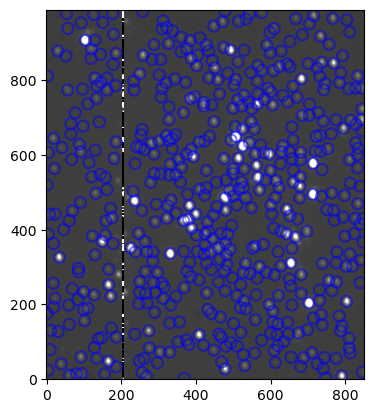

In [20]:
img = plt.imshow(science_frame_V[10:1000, 50: 900], origin='lower',
                 cmap='gray',vmin=-10, vmax=30) # plot data
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.show()




In [45]:
ap_sum_V = np.array(phot_table['aperture_sum'])

## science frame B

find counts in each star for B filter

In [21]:
hdu = fits.open('b_cluster_reduced.fits')
science_frame_B = hdu[0].data

In [22]:
# try getting started with photutils
imageB = science_frame_B[10:1000, 50: 900]

imageB -= np.median(imageB)  

In [23]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=15.0)  
phot_table = aperture_photometry(imageB, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 369.29775 1.0301129     -32.4999
  2   747.711 3.3775319   -48.052809
  3 268.02756 7.1771415    455.22985
  4 790.55845 8.6921986    1493.1077
  5 61.222234 10.347585    295.76782
  6 79.726307 14.367776    271.96078
  7 155.67023 14.062032    51.678932
  8 94.736376 14.681971     331.0465
  9 255.66794  17.53994    330.95378
 10 846.24408 18.544095    87.699511
 11 3.8599245 23.524448    48.737941
 12 478.55453 27.485918    2254.3259
 13 740.92065   27.5855   -92.933562
 14 187.00326  33.15259    130.20258
 15 680.83827 33.946528   -48.828295
 16 530.91804 36.153169    492.85964
 17 39.484944 40.607041    327.10739
 18 725.74104 41.458008   -76.953788
 19 296.89873 43.620623   -35.228049
 20 612.87126 44.211592    12.175061
 21 166.11555 47.815467    1406.1611
 22 469.14929 45.747087     438.0803
...       ...       ...          ...
510  57.14666 939.28917   -51.983241
5

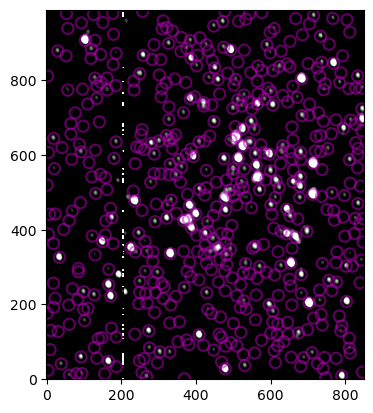

In [24]:
plt.imshow(imageB, cmap='gray',vmin=1,vmax=4, origin='lower')
apertures.plot(color='m', lw=1.5, alpha=0.5)
plt.show()

In [25]:
ap_sum_B = np.array(phot_table['aperture_sum'])

## science landolt V

find counts in each landolt star for V filter

MANUAL PHOTOMETRY

Star 111 1965, 
- V_mag 11.419 
- B-V: 1.710 
- (RA:19:37:42 dec:+00:26:50)

In [26]:
hdu = fits.open('v_science_reduced.fits')
landolt_frame_V = hdu[0].data

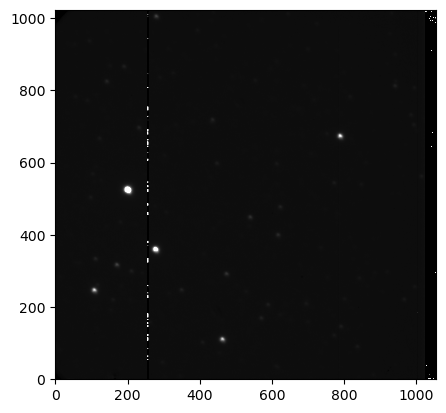

In [28]:
img = plt.imshow(landolt_frame_V, origin='lower', cmap='gray', vmin=1, vmax=100) # plot data
plt.show()

(350.0, 450.0)

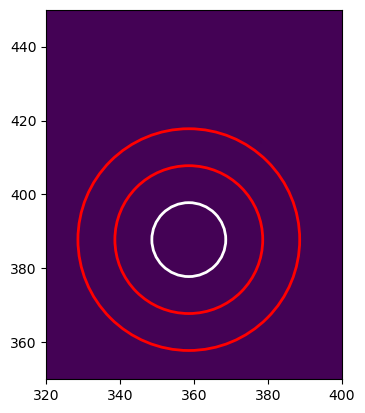

In [31]:
# notes manually
from astropy.visualization import simple_norm
from photutils.aperture import CircularAnnulus, CircularAperture


data = landolt_frame_V
positions = [ (358.544, 387.7875)] # landolt 111 1965
aperture = CircularAperture(positions, r=10) # keep radius consistent with the radius of cluster
annulus_aperture = CircularAnnulus(positions, r_in=20, r_out=30)


norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, vmin=1, vmax=1000, origin='lower')

ap_patches = aperture.plot(color='white', lw=2)
ann_patches = annulus_aperture.plot(color='red', lw=2)
plt.xlim(320, 400)
plt.ylim(350, 450)



In [32]:
from photutils.aperture import ApertureStats
aperstats = ApertureStats(data, annulus_aperture)
bkg_mean = aperstats.mean
print(bkg_mean)  

from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

aperture_area = aperture.area_overlap(data)
print(aperture_area)

total_bkg = bkg_mean * aperture_area
print(total_bkg) 

phot_bkgsub = phot_table['aperture_sum'] - total_bkg

phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub


for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

[6.38598971]
 id xcenter ycenter  aperture_sum
      pix     pix                
--- ------- -------- ------------
  1 358.544 387.7875    2004.5715
[314.15926536]
[2006.21783678]
 id xcenter ycenter  aperture_sum total_bkg aperture_sum_bkgsub
      pix     pix                                              
--- ------- -------- ------------ --------- -------------------
  1 358.544 387.7875    2004.5715 2006.2178          -1.6463486


In [33]:
landolt_sum_V = np.array(phot_table['aperture_sum_bkgsub'])

## science landolt B

find counts in each landolt star for B filter

B-V = 1.710


In [34]:
hdu = fits.open('b_science_reduced.fits')
landolt_frame_B = hdu[0].data

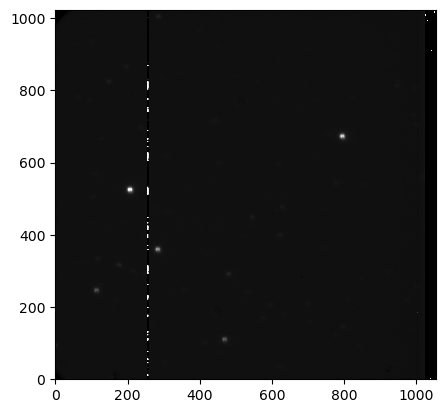

In [38]:
img = plt.imshow(landolt_frame_B, origin='lower', cmap='gray', vmin=1, vmax=50) # plot data
plt.show()

(350.0, 450.0)

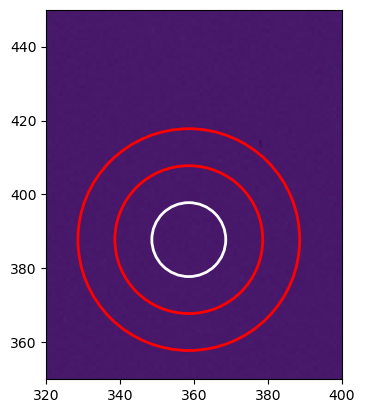

In [40]:
# notes manually
from astropy.visualization import simple_norm
from photutils.aperture import CircularAnnulus, CircularAperture


data = landolt_frame_B
positions = [ (358.544, 387.7875)] # landolt 111 1965
aperture = CircularAperture(positions, r=10) # keep radius consistent with the radius of cluster
annulus_aperture = CircularAnnulus(positions, r_in=20, r_out=30)


norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, vmin=1, vmax=50, origin='lower')

ap_patches = aperture.plot(color='white', lw=2)
ann_patches = annulus_aperture.plot(color='red', lw=2)
plt.xlim(320, 400)
plt.ylim(350, 450)



In [41]:
from photutils.aperture import ApertureStats
aperstats = ApertureStats(data, annulus_aperture)
bkg_mean = aperstats.mean
print(bkg_mean)  

from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

aperture_area = aperture.area_overlap(data)
print(aperture_area)

total_bkg = bkg_mean * aperture_area
print(total_bkg) 

phot_bkgsub = phot_table['aperture_sum'] - total_bkg

phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub


for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

[4.22697156]
 id xcenter ycenter  aperture_sum
      pix     pix                
--- ------- -------- ------------
  1 358.544 387.7875    1327.9596
[314.15926536]
[1327.94228112]
 id xcenter ycenter  aperture_sum total_bkg aperture_sum_bkgsub
      pix     pix                                              
--- ------- -------- ------------ --------- -------------------
  1 358.544 387.7875    1327.9596 1327.9423         0.017328616


In [43]:
landolt_sum_B = np.array(phot_table['aperture_sum_bkgsub'])

# magnitude V

In [46]:
# m1 - m_ref = -2.5log_10 (F1/F_ref)

F_ref_V = landolt_sum_V
m_ref_V = 11.419

F1_V = ap_sum_V

M_V = m_ref_V-2.5*np.log10(F1_V/F_ref_V)


/tmp/ipykernel_59301/2290859446.py:8: RuntimeWarning: invalid value encountered in log10
  M_V = m_ref_V-2.5*np.log10(F1_V/F_ref_V)


# magnitude B

In [47]:
F_ref_B = landolt_sum_B
m_ref_B = 1.710+m_ref_V
print(m_ref_B)

F1_B = ap_sum_B

M_B = m_ref_B-2.5*np.log10(F1_B/F_ref_B)


13.129000000000001


/tmp/ipykernel_59301/3815541205.py:7: RuntimeWarning: invalid value encountered in log10
  M_B = m_ref_B-2.5*np.log10(F1_B/F_ref_B)


ValueError: x and y must be the same size

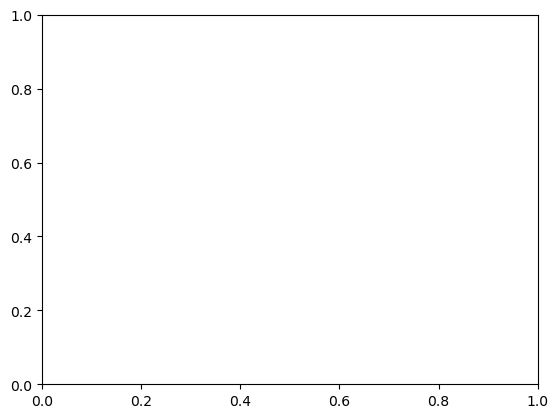

In [48]:
plt.scatter(M_B-M_V,M_V, color='m', s=10, alpha=0.7)
plt.ylabel('V [mag]')
plt.xlabel('B - V')
plt.ylim(18, 10)
plt.xlim(-.5, 4)
#outliers caused by backgroudn stars not in cluster
# or aperture too small and cuaght different starlight
#plt.savefig('./HR_diagram.png', dpi=400)